In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import imp
from IPython.display import YouTubeVideo
from IPython.display import HTML

In [3]:
from PIL import Image, ImageChops

def trim(im, percent=36):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        x = im.crop(bbox)
        return x.resize(((x.size[0]*percent)/100, (x.size[1]*percent)/100), Image.ANTIALIAS)

def resize(filename, percent=36):
    trim(Image.open(filename + ".png"), percent).save(filename + "_r" + str(percent) + ".png")

# EECS 545:  Machine Learning
## Lecture 20:  Neural Networks (Part 2)
* Instructor:  **Junhyuk Oh**
* Date:  April 11, 2016
- Many Slides/Figures/Examples/Ideas from:
  - Nando De Freitas (University of Oxford)
  - Richard Socher (MetaMind)

### Outline

- Motivation
- Basics of Neural Networks
  - Forward Propagation
  - Backward Propagation
- Deep Neural Networks
  - Convolutional Neural Networks
  - **Recurrent Neural Networks** 
- Applications
  - Computer Vision
  - Natural Language Processing
  - Reinforcement Learning

### Outline: Recurrent Neural Networks
- Introduction
- Standard RNN
  - Forward Propagation
  - Backward Propagation
- Long Short-Term Memory (LSTM)

### Recurrent Neural Networks (RNN)
- A special kind of neural network designed for modeling sequential data
  - Can take arbitrary number of inputs through time
  - Can produce arbitrary number of outputs through time
- Examples of sequential problems
  - Next word prediction
  - Machine translation
  - Speech recognition
  - Image caption generaion

### Outline: Recurrent Neural Networks
- Introduction
- **Standard RNN**
  - **Forward Propagation**
  - Backward Propagation
- Long Short-Term Memory (LSTM)
- Example: Character-level language modeling

### Standard RNN
$$ \textbf{h}_t = f(\textbf{W}\textbf{x}_t + \textbf{U}\textbf{h}_{t-1}+\textbf{b}) $$
$$ \hat{\textbf{y}}_t = \textbf{V}\textbf{h}_t $$
$$ \mathcal{L} = \sum_{t=1}^{T} \mathcal{L}_t \left( \textbf{y}_t, \hat{\textbf{y}}_t \right) $$
- $\textbf{W}$: input weight, $\textbf{U}$: recurrent weight, $\textbf{V}$: output weight, $\textbf{b}$: bias
- $f$ is a non-linear activation function (e.g., ReLU)
- Weights are shared across time: the number of parameters does not depend on the length of input/output sequence
<img src="images/simple_rnn.png" />

### Forward Propagation
<img src="images/simple_rnn_fprop.png" width=800px />

### Outline: Recurrent Neural Networks
- Introduction
- Standard RNN
  - Forward Propagation
  - **Backward Propagation**
- Long Short-Term Memory (LSTM)
- Example: Character-level language modeling

### Backpropagation Through Time (BPTT)
- Gradient w.r.t. hidden units (given $\frac{\partial \mathcal{L}}{\partial \textbf{h}_{t+1}}$)
$$ \frac{\partial\mathcal{L}}{\partial \textbf{h}_t} = \sum_{\tau=t}^{T}\frac{\partial\mathcal{L}_{\tau}}{\partial \textbf{h}_t} \mbox { } (\because \frac{\partial\mathcal{L}_k}{\partial \textbf{h}_t}=0 \mbox { if } k < t)$$ 
$$ \frac{\partial\mathcal{L}}{\partial \textbf{h}_t} = \frac{\partial \mathcal{L}_t}{\partial \textbf{h}_t} + \frac{\partial \textbf{h}_{t+1}}{\partial \textbf{h}_{t}} \frac{\partial \sum_{\tau=t+1}^{T}\mathcal{L}_{\tau}}{\partial \textbf{h}_{t+1}}  \\
= \underbrace{\frac{\partial \mathcal{L}_t}{\partial \hat{\textbf{y}}_t}}_{\mbox{easy}}\underbrace{\frac{{\partial \hat{\textbf{y}}_t}}{\partial \textbf{h}_t}}_{\mbox{easy}} + \underbrace{\frac{\partial \textbf{h}_{t+1}}{\partial \textbf{h}_{t}}}_{\mbox{easy}} \underbrace{\frac{\partial \mathcal{L}}{\partial \textbf{h}_{t+1}}}_{\mbox{given}} $$
<img src="images/simple_rnn.png", width=600px />

### Backpropagation Through Time (BPTT)
- Assume that a loss function defined as:
$$ \mathcal{L} = \sum_{t=1}^{T} \mathcal{L}_t \left( \textbf{y}_t, \hat{\textbf{y}}_t \right) $$
- Gradient w.r.t. input units (given $\frac{\partial \mathcal{L}}{\partial \textbf{h}_{t}}$)
$$ \frac{\partial\mathcal{L}}{\partial \textbf{x}_t} = \frac{\partial \mathcal{L}}{\partial \textbf{h}_t}\frac{\partial \textbf{h}_t}{\partial \textbf{x}_t} $$
<img src="images/simple_rnn.png", width=700px />

### Backward Propagation
<img src="images/simple_rnn_back2.png" width=800px align="middle" />

### Backward Propagation
<img src="images/simple_rnn_back3.png" width=800px />

### Backward Propagation
<img src="images/simple_rnn_back4.png" width=800px />

### Backward Propagation
<img src="images/simple_rnn_back5.png" width=800px />

### Backward Propagation
<img src="images/simple_rnn_back6.png" width=800px />

### Backward Propagation
<img src="images/simple_rnn_back7.png" width=800px />

### Backpropagation Through Time (BPTT)
- Gradient w.r.t. weights
  - Note: the weights are shared through time
  - Recall: we should accumulate gradients through time
<font color='red'>$$ \frac{\partial \mathcal{L}}{\partial \textbf{V}} = \sum_{t=1}^{T}\frac{\partial \mathcal{L}}{\partial \hat{\textbf{y}}_t}\frac{\partial \hat{\textbf{y}}_t}{\partial \textbf{V}} $$ </font>
<font color='blue'>$$ \frac{\partial \mathcal{L}}{\partial \textbf{W}} = \sum_{t=1}^{T}\frac{\partial \mathcal{L}}{\partial \hat{\textbf{h}}_t}\frac{\partial \hat{\textbf{h}}_t}{\partial \textbf{W}} $$ </font>
<font color='green'>$$ \frac{\partial \mathcal{L}}{\partial \textbf{U}} = \sum_{t=1}^{T}\frac{\partial \mathcal{L}}{\partial \hat{\textbf{h}}_t}\frac{\partial \hat{\textbf{h}}_t}{\partial \textbf{U}} $$ </font>
<img src="images/simple_rnn_back_w.png" width=500px/>

### Backpropagation Through Time (BPTT)
- BPTT is actually not different from backpropagation.
- RNN is actually not much different from a standard (feedforward) neural network except that:
  - Input/output are given through time.
  - Weights are extensively shared.

### Outline: Recurrent Neural Networks
- Introduction
- Standard RNN
  - Forward Propagation
  - Backward Propagation
- **Long Short-Term Memory (LSTM)**
- Example: Character-level language modeling

### Vanshing Gradient Problem
- RNN can model arbitrary sequences if properly trained.
- In practice, it is difficult to train it for long-term dependencies because of vanishing gradient.
- Intuitively, a hidden unit does not affect other units in the long-term future due to new inputs.
  - Gradients are diffused through time
![](images/vanish_rnn.png)
<span style="color:gray; font-size:10px; float:right">(Figure from Alex Graves)</span>

### Long Short-Term Memory (LSTM)
- A special type of RNN for handling **vanishing gradient** problem.
- $c_t$ is a **memory cell** preserving information about history of inputs.
- $h_t$ is the hidden activation which is given to the output layer.
- $i_t,o_t,f_t$ are **input gate**, **output gate**, and **forget gate** respectively.
![](images/lstm.png)
<span style="color:gray; font-size:10px; float:right">(Figure from Alex Graves)</span>

### Long Short-Term Memory (LSTM)
- Gating mechanism control the following:
  - whether to ignore a new input or not
  - whether to produce an output or not (while preserving the memory cell)
  - whether to erase the memory cell or not
- Gating is controlled by LSTM's weights that are also learned from data.
![](images/vanish_lstm.png)
<span style="color:gray; font-size:10px; float:right">(Figure from Alex Graves)</span>

### Outline: Recurrent Neural Networks
- Introduction
- Simple RNN
  - Forward Propagation
  - Backward Propagation
- Long Short-Term Memory (LSTM)
- **Example: Character-level language modeling**

### Character-level language modeling
- A character is represented as a one-of-k vector (k: #characters).
- Goal: build a character-level generative model
$$ P(x_1,x_2,...,x_T) = \prod_{t=1}^{T}P(x_{t}|x_{t-1},...,x_1) \\ \approx \prod_{t=1}^{T}P(x_{t}|x_{t-1},...,x_{t-n}) $$
<img src="images/char_rnn.png" width=700px />

### Character-level language modeling
- RNN is trained to predict the next character given previous characters
  - The loss can be formulated as a sum of cross entropy losses.
  - After training, the network can generate reasonable characters.
$$ \mathcal{L}(\textbf{x}) = -\sum_{t=1}^{T}\log P(x_{t}|x_{t-1},...,x_{t-n}; \theta) $$
<img src="images/char_rnn.png" width=700px />

### Shakespeare
<img src="images/char_rnn2.png" width=700px />
<span style="color:gray; font-size:10px; float:right">(Figure from Richard Socher)</span>

### Wikipedia
<img src="images/char_rnn3.png" width=900px />
<span style="color:gray; font-size:10px; float:right">(Figure from Richard Socher)</span>

### Latex
<img src="images/char_rnn4.png" width=900px />
<span style="color:gray; font-size:10px; float:right">(Figure from Richard Socher)</span>

### C++ Code
<img src="images/char_rnn5.png" width=900px />
<span style="color:gray; font-size:10px; float:right">(Figure from Richard Socher)</span>

### Summary of RNN
- RNN is a special type of neural network that can model time-series data
  - Weights are shared acorss time
  - Backpropagation through time is used.
- LSTM is a special type of RNN that is designed for handling vanishing gradient problem.

### Outline

- Motivation
- Basics of Neural Networks
  - Forward Propagation
  - Backward Propagation
- Deep Neural Networks
  - Convolutional Neural Networks
  - Recurrent Neural Networks
- Applications
  - **Computer Vision** 
  - Natural Language Processing
  - Reinforcement Learning

### Object Detection
- CNN approaches have recently achieved state-of-the-art results on object detection task.
- Example: Regions with CNN
  - Use a low-level region proposal methods
  - Use a CNN to do classification for each region
<img src="images/object_detection.png" width=1000px />
<span style="color:gray; font-size:10px; float:right">(Girshick et al, "Reigion-based Convolutional Networks for Accurate Object Detection and Semantic Segmentation", PAMI, 2015.)</span>

### Object Segmentation
- Can be formulated as pixel-wise classification 
- Pre-trained on a large-scale classification dataset (ImageNet)
<img src="images/object_segmentation.png" width=800px />
<!--span style="color:gray; font-size:10px; float:right">(Girshick et al, "Reigion-based Convolutional Networks for Accurate Object Detection and Semantic Segmentation", PAMI, 2015.)</span>!-->

### Object Segmentation
<img src="images/object_segmentation3.png" width=800px />
<!--span style="color:gray; font-size:10px; float:right">(Girshick et al, "Reigion-based Convolutional Networks for Accurate Object Detection and Semantic Segmentation", PAMI, 2015.)</span>!-->

### Image Generation
- Goal: $\max_{\theta} \mathbb{E}_{\textbf{x}} \left[\log P\left(\textbf{x} ; \theta \right)\right]$
- Outcome: generate random samples from the learned model!

### Image Generation: DRAW Network
- Introduce a differentiable visual attention mechanism
- Learn to move attention window through time during image generation (without any supervision).
<img src="images/draw.png" width=600px />
<!--span style="color:gray; font-size:10px; float:right">(Girshick et al, "Reigion-based Convolutional Networks for Accurate Object Detection and Semantic Segmentation", PAMI, 2015.)</span>!-->

### Image Generation: DRAW Network


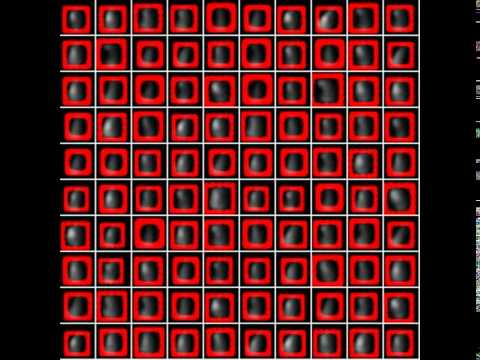

In [8]:
YouTubeVideo("Zt-7MI9eKEo", width=800, height=600)

### Image Generation: Adversarial Network 
- Model : Generator (G), Discriminator (D)
- Generator (G) : Learns to generate realistic images
- Discriminator (D) : Learns to classify whether a given image is sampled from data or not
- Objective : Fool each other!
<img src="images/gan.png" width=1000px />
<!--span style="color:gray; font-size:10px; float:right">(Girshick et al, "Reigion-based Convolutional Networks for Accurate Object Detection and Semantic Segmentation", PAMI, 2015.)</span>!-->

### Image Generation: Adversarial Network 
<img src="images/gan2.png" width=1000px />
<!--span style="color:gray; font-size:10px; float:right">(Girshick et al, "Reigion-based Convolutional Networks for Accurate Object Detection and Semantic Segmentation", PAMI, 2015.)</span>!-->

### Image Generation: Adversarial Network 
<img src="images/gan3.png" width=1000px />
<!--span style="color:gray; font-size:10px; float:right">(Girshick et al, "Reigion-based Convolutional Networks for Accurate Object Detection and Semantic Segmentation", PAMI, 2015.)</span>!-->

### Video Prediction
- Predict future frames given previous frames and actions
<img src="images/video_prediction.png" />

### Video Prediction

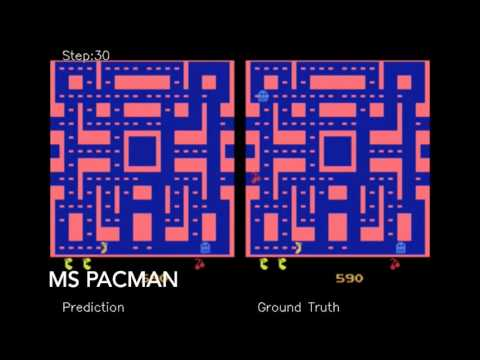

In [11]:
YouTubeVideo("7FBFhG2LgNQ", width=800, height=600)

### Outline

- Motivation
- Basics of Neural Networks
  - Forward Propagation
  - Backward Propagation
- Deep Neural Networks
  - Convolutional Neural Networks
  - Recurrent Neural Networks
- Applications
  - Computer Vision
  - **Natural Language Processing**
  - Reinforcement Learning

### Sequence-to-Sequence Learning Framework
- A general RNN framework for sequence-to-sequence prediction
$$ P \left(y_1, y_2, ... , y_{T'} \vert x_1, x_2, ..., x_{T} \right)$$
<img src="images/seq_to_seq.png" />

### Seq2Seq: Application to Machine Translation
- Achives state-of-the-art results on English-to-French dataset.
<img src="images/seq_to_seq2.png" width=1000px />

### Seq2Seq: Application to Grammar Parsing
- A parsing tree can be represented as a sequence
- Seq2Seq framework can be applied (sentence $\rightarrow$ parse tree)
<img src="images/grammar.png" width=800px />

### Seq2Seq: Application to Grammar Parsing

<img src="images/grammar2.png" width=800px />

### Seq2Seq: Application to Python Execution
- Input: source code
- Output: execution result
<img src="images/python.png" />

### Seq2Seq: Application to Python Execution
<img src="images/python2.png" />

### Image Caption Generation
- Idea proposed by Vinyals et al.
  - Use a pre-trained CNN to extract image features
  - Condition a RNN for generating an image description.
<img src="images/image_caption.png" />

### Image Caption Generation
<img src="images/image_caption2.png" />

### Image Caption Generation
- Another idea proposed by Xu et al.
  - Let the model pay attention to only a part of an image when generating a word.
<img src="images/image_caption3.png" width=700px />
<img src="images/image_caption4.png" width=700px />

### Image Caption Generation
- Some examples from the work by Kiros et al.
<img src="images/image_caption6.png" width=800px />

### Outline

- Motivation
- Basics of Neural Networks
  - Forward Propagation
  - Backward Propagation
- Deep Neural Networks
  - Convolutional Neural Networks
  - Recurrent Neural Networks
- Applications
  - Computer Vision
  - Natural Language Processing
  - **Reinforcement Learning**

### Reinforcement Learning
- An agent observes a state $s_t$, chooses an action $a_t$, receives a reward $r_t$, and goes to the next state $s_{t+1}$.
- The goal is to maximize the total reward until the episode terminates (episodic task).
<img src="images/rl.png" width=700px />

### Brief Summary of Q-Learning
- $Q(s,a)$: expected total future reward for choosing action $a$ at state $s$.
- The agent learns to estimate $Q(s,a)$ by trial-and-error.
- Greedy policy: $\mbox{argmax}_a Q(s,a)$
- Problem: need to approximate $Q(s,a)$ when the state space is very large.
<img src="images/rl.png" width=700px />

### Deep Q-Network
- A recent breakthrough from Google DeepMind
- Achieves human-level performances on many Atari 2600 games
<img src="images/dqn.png" width=400px />

### Deep Q-Network
- Key idea: Use CNN to approximate Q-values
<img src="images/dqn2.png" width=700px />

### Deep Q-Network

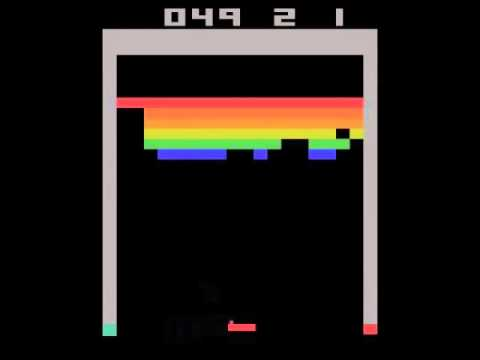

In [12]:
YouTubeVideo("Q70ulPJW3Gk", width=800, height=600)

### AlphaGo
- Another breakthrough from Google DeepMind
- Achieves super-human performance on Go
<img src="images/alphago.jpg" width=400px />

### Brief Summary of Monte-Carlo Tree Search (MTCS)
- Simulate many possible futures and choose the best action
- Problem: search space is too large!
  - Search over only a reasonable state space (tree policy should be reasonable).
  - Search up to a certain depth and use a default policy to get the outcome.
<img src="images/alphago2.png" width=700px />

### AlphaGo
- Idea: use a deep CNN to learn a reasonable policy
  0. Supervised Learning: Train a **policy network** to predict human expert's move.
  0. Reinforcement Learning: Improve the policy network through self-play.
  0. Reinforcement Learning: Train a **value network** to predict whether the agent wins at the end or not.
  0. Use the learned networks to do MCTS more efficiently!
<img src="images/alphago3.png" width=1000px />

### AlphaGo
- Result: AlphaGo beat Lee Sedol (the world’s top Go player).
<!-- (Photo : Google Handout | Getty Images) !-->
<img src="images/alphago5.jpg", width=500px />

### Summary 
- Deep Learning: machine learning algorithms based on learning multiple levels of representation.
- Neural networks can implement the idea of deep learning in a very flexible way.
- Deep neural networks (e.g., CNN, RNN) have made remarkable advances in computer vision, natural language processing, and reinforcement learning area.
- Open problems
  - Unsupservised learning
  - Learning long-term dependencies
  - Data efficiency